# Keras Regression Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Import Libraries and Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Check if any missing data
df.isnull().sum()
#No Missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/tmp/ipykernel_21118/4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

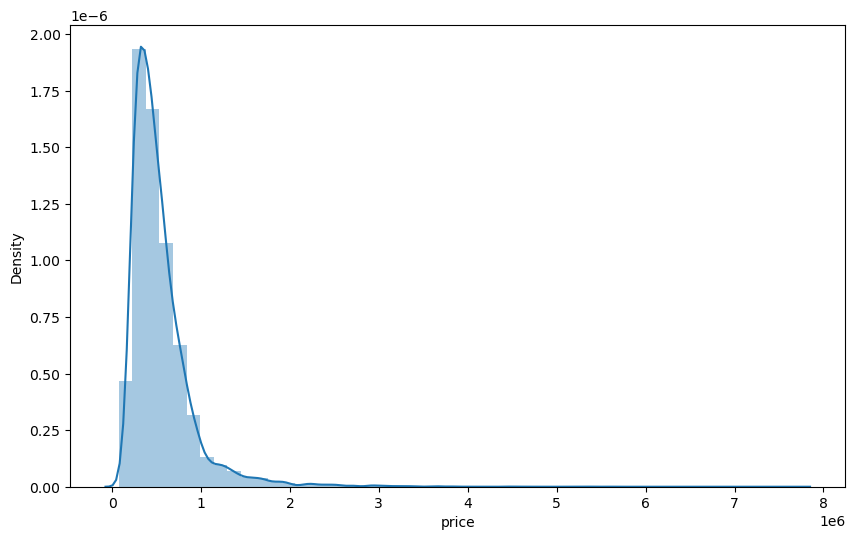

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

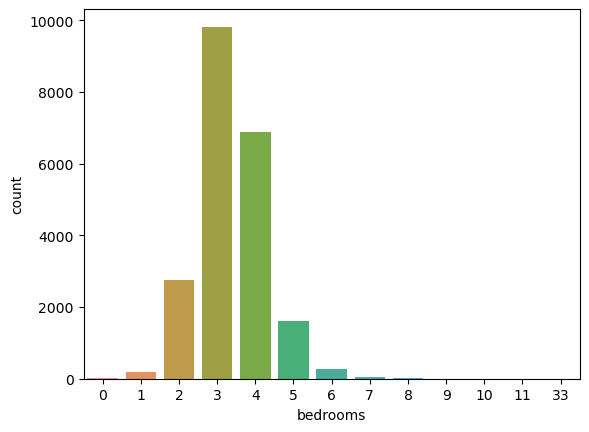

In [8]:
sns.countplot(data=df, x=df['bedrooms'])

In [9]:
df.corr()

/tmp/ipykernel_21118/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
df.corr()['price'].sort_values()

/tmp/ipykernel_21118/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

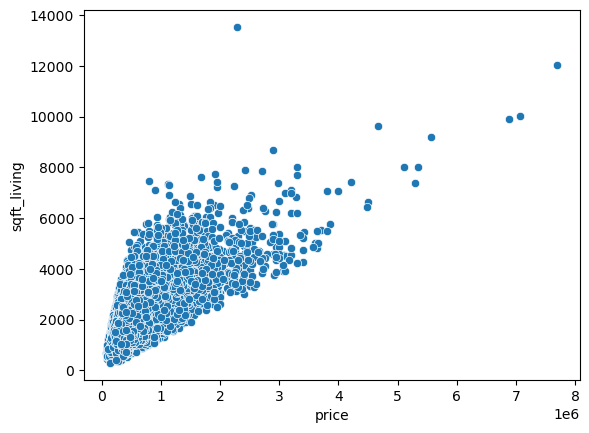

In [11]:
# sqft_living is highly correlated with price
sns.scatterplot(data=df, x=df['price'], y=df['sqft_living'])

<Axes: xlabel='bedrooms', ylabel='price'>

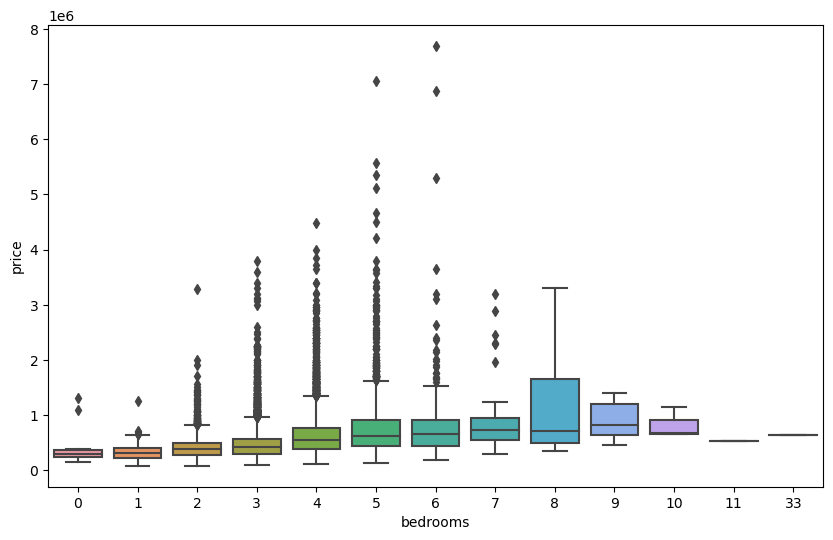

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=df['bedrooms'], y=df['price'])

<Axes: xlabel='price', ylabel='long'>

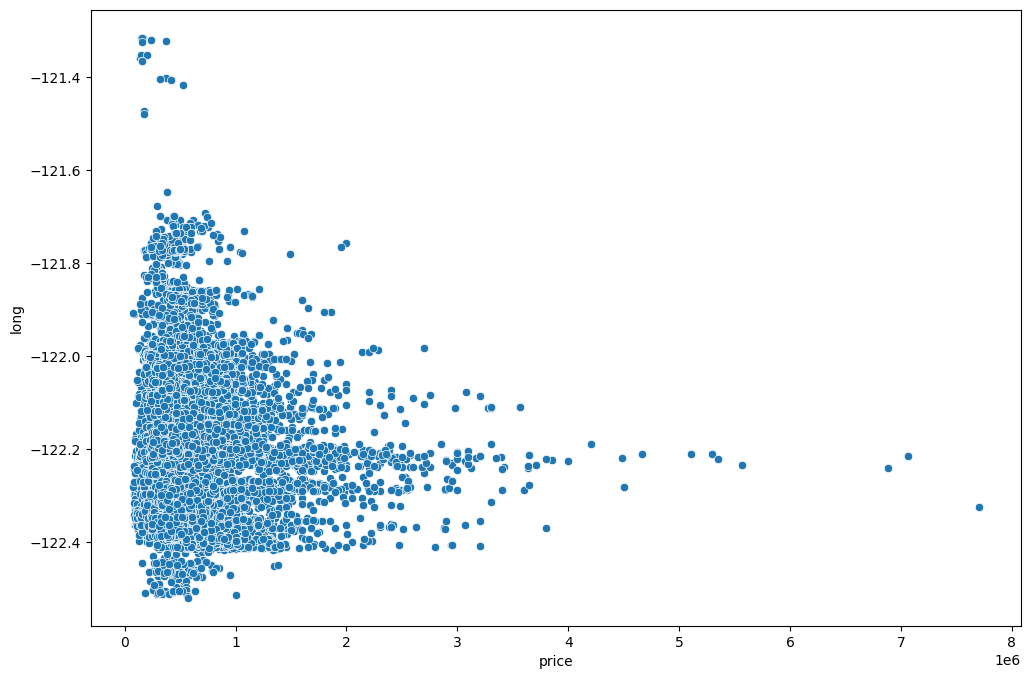

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'price', y = 'long')

<Axes: xlabel='price', ylabel='lat'>

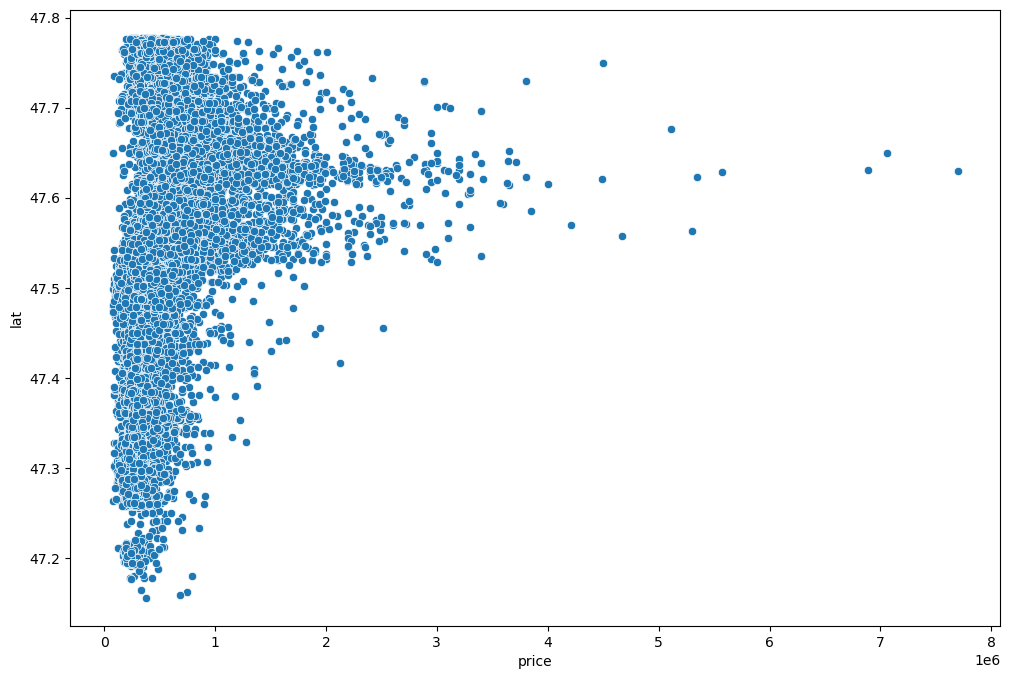

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'price', y = 'lat')

<Axes: xlabel='long', ylabel='lat'>

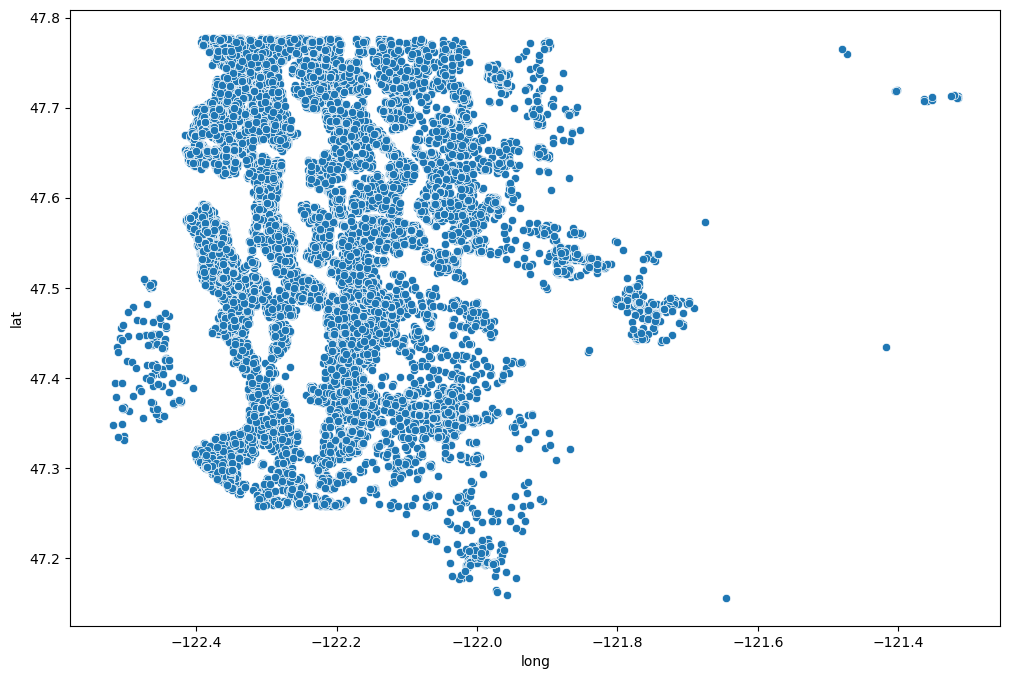

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'long', y = 'lat')

<Axes: xlabel='long', ylabel='lat'>

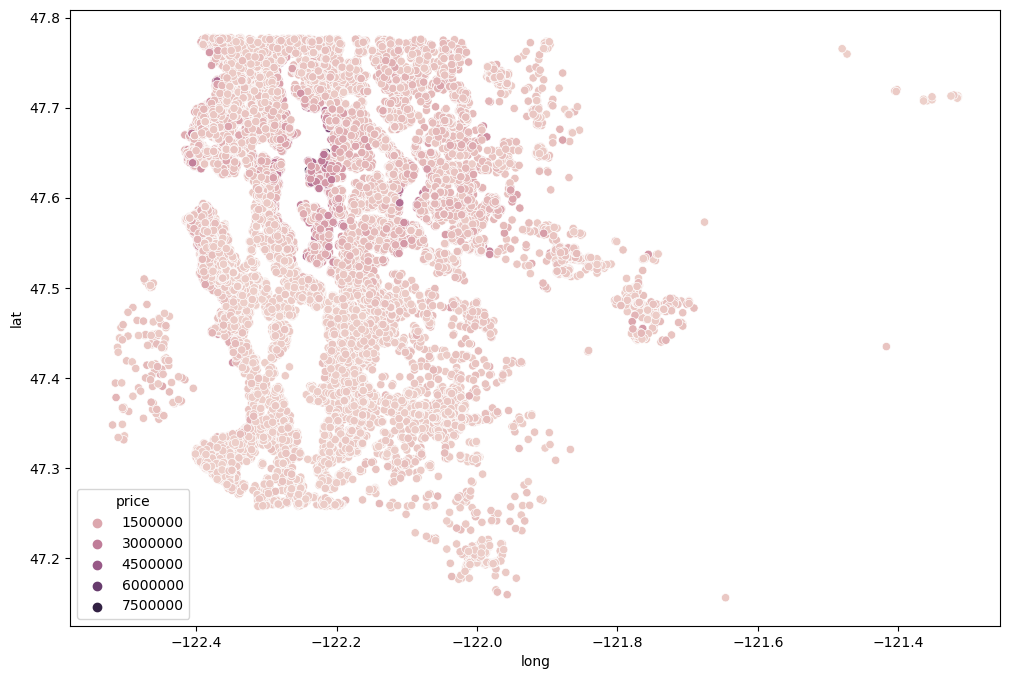

In [16]:
# Now with hue = price
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'long', y = 'lat', hue = 'price')

In [17]:
# as there are few house which are extremely expensive houses
# therefore i am not getting a plot lets remove those rows
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
len(df)

21613

In [19]:
# lets sample out the top 1% of the houses
len(df)*0.01

216.13

In [20]:
# I will grab anything after top 1 % of the houses
df_non_top_1_percent = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

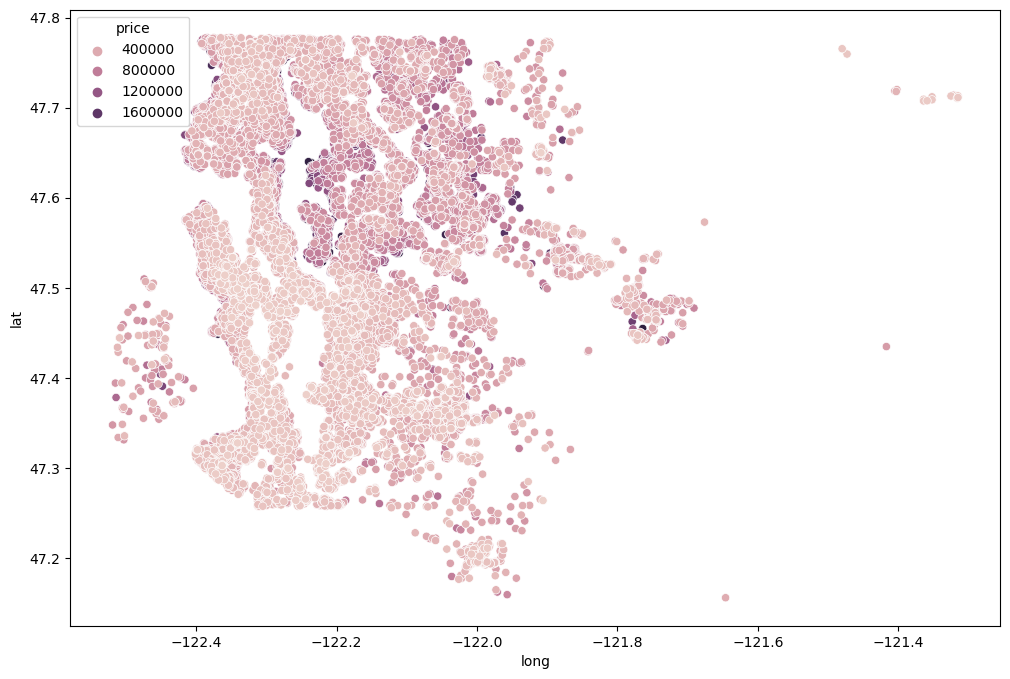

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_non_top_1_percent, x = 'long', y = 'lat', hue = 'price')

In [22]:
#  we can clearly see houses near water are expensive, lets extract more insights from this graph

<Axes: xlabel='long', ylabel='lat'>

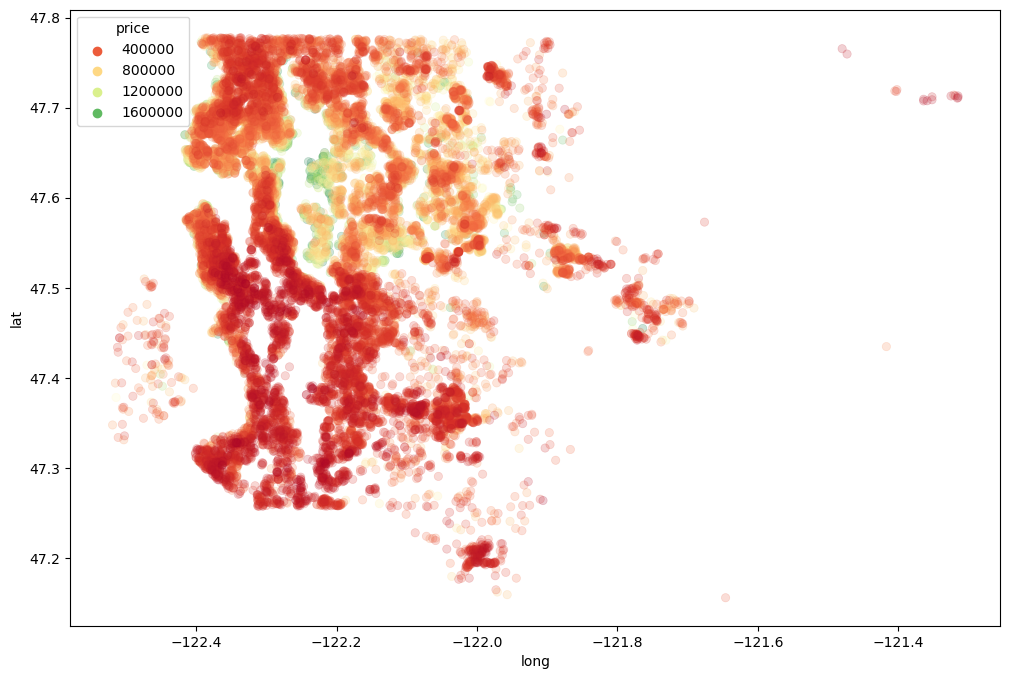

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_non_top_1_percent, x = 'long', y = 'lat', hue = 'price', edgecolor = None, alpha=0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

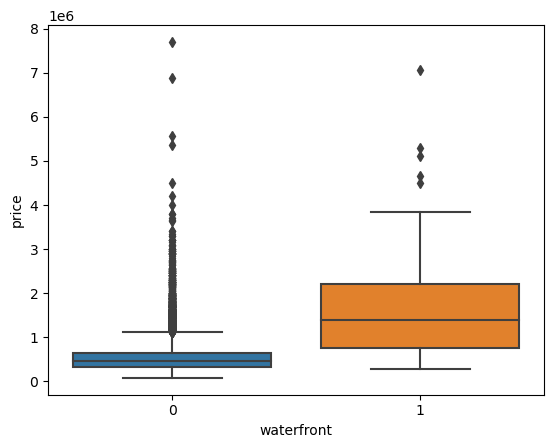

In [24]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
# 1. We dont need id - drop it
df = df.drop('id', axis = 1)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.date
# date is a object type lets convert it into date object so that we can grab year and month as new features

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [31]:
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

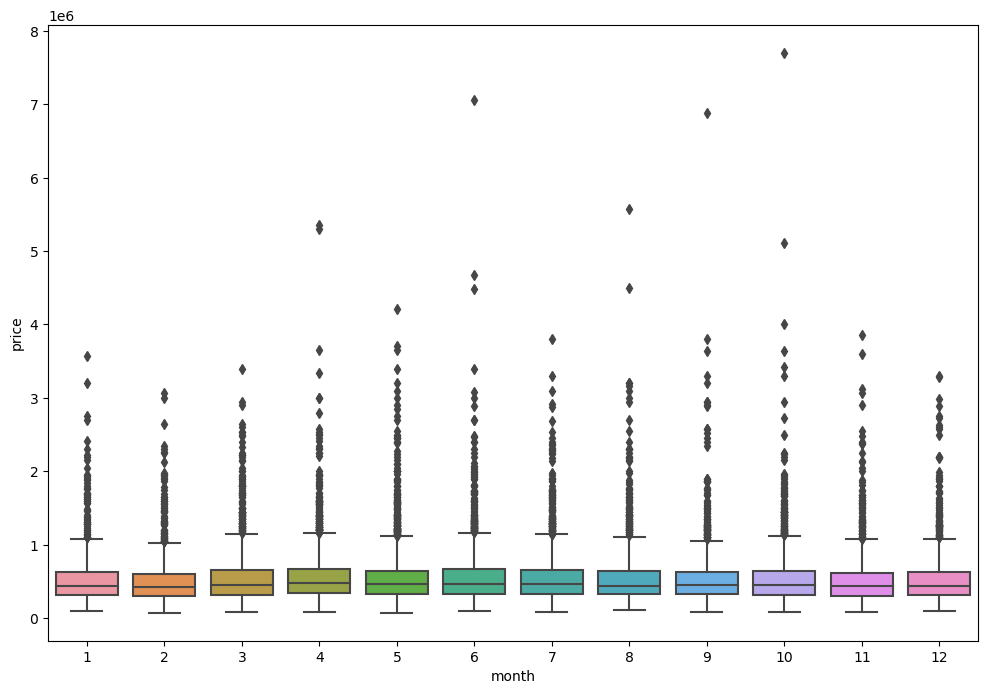

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['month'],y = df['price'], data = df)

/tmp/ipykernel_21118/3834763391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot()


<Axes: xlabel='month'>

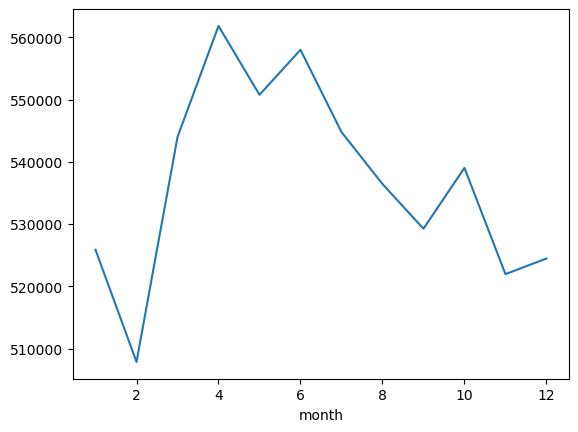

In [34]:
df.groupby('month').mean()['price'].plot()

/tmp/ipykernel_21118/366114082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

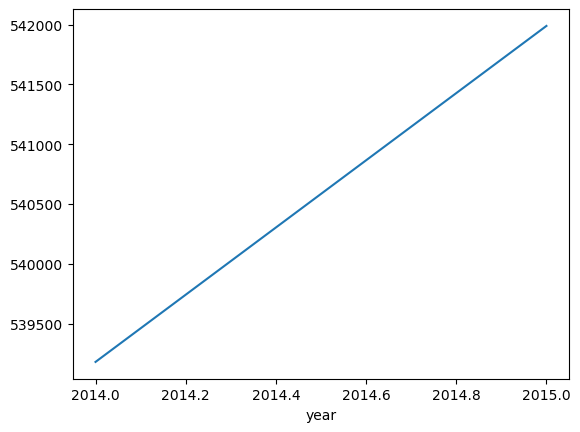

In [35]:
df.groupby('year').mean()['price'].plot()

In [36]:
# Now we dont need date column
df = df.drop('date', axis = 1)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [38]:
# We cant directly give zipcodes to our model, as model will consider it some numerical value which influences the price of the house, we need to convert it in to categorical data.
#  lets see how many ubique zip codes we have
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [39]:
#  We have 70 unique zipcodes it a lot to make dummy categorical variables, 
#  In real case we have eo divide zipcodes like north_zipcodes, south_zipcodes, or expensive_area_zipcodes , non_expensive_area_zipcodes with the help of an expert of the king city
#  Lets just drop the zipcode column for now
df = df.drop('zipcode', axis = 1)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [41]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [42]:
#  most of the houses 20699 are not renovated, 
# so we can convert it into a categorical variable - renovated or not_renovated

# But we will keep it as it is - as it indicates
# that most recent renovated house has higher price - 2014 

# same with sqft_basement

In [43]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

# Train Test Split

In [44]:
X = df.drop('price',axis = 1).values
y = df['price'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
# we need to scale our values- only on train split to prevent data leakage
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-03-11 21:33:02.644088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
X_train.shape
#  we have 19 incoming features therefore 
# it is good to have 19 neurons in our layer

(15129, 19)

In [53]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

2024-03-11 21:33:03.563605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 21:33:03.565068: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [54]:
# model.fit(x=X_train,y=y_train,
#           validation_data=(X_test,y_test),
#           batch_size=128, epochs=400)
# # batch size in exponential of 2


model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128, epochs=500)


Epoch 1/500
119/119 [==============================] - 1s 3ms/step - loss: 423619624960.0000 - val_loss: 432970072064.0000
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 422095323136.0000 - val_loss: 427658018816.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 402255675392.0000 - val_loss: 382323490816.0000
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 311809376256.0000 - val_loss: 239927918592.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 159331254272.0000 - val_loss: 115492929536.0000
Epoch 6/500
119/119 [==============================] - 0s 3ms/step - loss: 101586395136.0000 - val_loss: 104231616512.0000
Epoch 7/500
119/119 [==============================] - 0s 3ms/step - loss: 98186461184.0000 - val_loss: 102497476608.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 96641761280.0000 - val_loss: 100842692608.0000
Epoch 9/500
119/11

119/119 [==============================] - 0s 2ms/step - loss: 39472746496.0000 - val_loss: 39308972032.0000
Epoch 69/500
119/119 [==============================] - 0s 2ms/step - loss: 39324487680.0000 - val_loss: 39144710144.0000
Epoch 70/500
119/119 [==============================] - 0s 2ms/step - loss: 39127547904.0000 - val_loss: 39087935488.0000
Epoch 71/500
119/119 [==============================] - 0s 3ms/step - loss: 38977019904.0000 - val_loss: 38841749504.0000
Epoch 72/500
119/119 [==============================] - 0s 2ms/step - loss: 38857187328.0000 - val_loss: 38638657536.0000
Epoch 73/500
119/119 [==============================] - 0s 2ms/step - loss: 38721245184.0000 - val_loss: 38466166784.0000
Epoch 74/500
119/119 [==============================] - 0s 2ms/step - loss: 38557835264.0000 - val_loss: 38320062464.0000
Epoch 75/500
119/119 [==============================] - 0s 2ms/step - loss: 38448300032.0000 - val_loss: 38176059392.0000
Epoch 76/500
119/119 [===============

Epoch 135/500
119/119 [==============================] - 0s 2ms/step - loss: 33716996096.0000 - val_loss: 33150834688.0000
Epoch 136/500
119/119 [==============================] - 0s 2ms/step - loss: 33686005760.0000 - val_loss: 33113532416.0000
Epoch 137/500
119/119 [==============================] - 0s 3ms/step - loss: 33675866112.0000 - val_loss: 33081772032.0000
Epoch 138/500
119/119 [==============================] - 0s 2ms/step - loss: 33646798848.0000 - val_loss: 33027190784.0000
Epoch 139/500
119/119 [==============================] - 0s 2ms/step - loss: 33569069056.0000 - val_loss: 33159260160.0000
Epoch 140/500
119/119 [==============================] - 0s 2ms/step - loss: 33538445312.0000 - val_loss: 32969635840.0000
Epoch 141/500
119/119 [==============================] - 0s 2ms/step - loss: 33478076416.0000 - val_loss: 32938723328.0000
Epoch 142/500
119/119 [==============================] - 0s 2ms/step - loss: 33438543872.0000 - val_loss: 32892452864.0000
Epoch 143/500
11

119/119 [==============================] - 0s 2ms/step - loss: 31748327424.0000 - val_loss: 31146463232.0000
Epoch 202/500
119/119 [==============================] - 0s 2ms/step - loss: 31704082432.0000 - val_loss: 31127990272.0000
Epoch 203/500
119/119 [==============================] - 0s 2ms/step - loss: 31717042176.0000 - val_loss: 31089618944.0000
Epoch 204/500
119/119 [==============================] - 0s 2ms/step - loss: 31707959296.0000 - val_loss: 31120617472.0000
Epoch 205/500
119/119 [==============================] - 0s 2ms/step - loss: 31667615744.0000 - val_loss: 31047995392.0000
Epoch 206/500
119/119 [==============================] - 0s 2ms/step - loss: 31638734848.0000 - val_loss: 31050233856.0000
Epoch 207/500
119/119 [==============================] - 0s 2ms/step - loss: 31576135680.0000 - val_loss: 31170465792.0000
Epoch 208/500
119/119 [==============================] - 0s 2ms/step - loss: 31612071936.0000 - val_loss: 31029168128.0000
Epoch 209/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30637125632.0000 - val_loss: 30259171328.0000
Epoch 268/500
119/119 [==============================] - 0s 2ms/step - loss: 30607894528.0000 - val_loss: 30109857792.0000
Epoch 269/500
119/119 [==============================] - 0s 3ms/step - loss: 30609043456.0000 - val_loss: 30088865792.0000
Epoch 270/500
119/119 [==============================] - 0s 3ms/step - loss: 30582579200.0000 - val_loss: 30063398912.0000
Epoch 271/500
119/119 [==============================] - 0s 2ms/step - loss: 30585403392.0000 - val_loss: 30040487936.0000
Epoch 272/500
119/119 [==============================] - 0s 2ms/step - loss: 30517577728.0000 - val_loss: 30079655936.0000
Epoch 273/500
119/119 [==============================] - 0s 3ms/step - loss: 30525564928.0000 - val_loss: 30233980928.0000
Epoch 274/500
119/119 [==============================] - 0s 3ms/step - loss: 30487721984.0000 - val_loss: 30048114688.0000
Epoch 275/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29658447872.0000 - val_loss: 29441323008.0000
Epoch 334/500
119/119 [==============================] - 0s 2ms/step - loss: 29640228864.0000 - val_loss: 29397417984.0000
Epoch 335/500
119/119 [==============================] - 0s 2ms/step - loss: 29633339392.0000 - val_loss: 29458845696.0000
Epoch 336/500
119/119 [==============================] - 0s 2ms/step - loss: 29606819840.0000 - val_loss: 29389291520.0000
Epoch 337/500
119/119 [==============================] - 0s 2ms/step - loss: 29596112896.0000 - val_loss: 29372768256.0000
Epoch 338/500
119/119 [==============================] - 0s 2ms/step - loss: 29606922240.0000 - val_loss: 29371111424.0000
Epoch 339/500
119/119 [==============================] - 0s 2ms/step - loss: 29613735936.0000 - val_loss: 29367212032.0000
Epoch 340/500
119/119 [==============================] - 0s 2ms/step - loss: 29602734080.0000 - val_loss: 29375608832.0000
Epoch 341/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28749574144.0000 - val_loss: 28750292992.0000
Epoch 400/500
119/119 [==============================] - 0s 2ms/step - loss: 28764352512.0000 - val_loss: 28750247936.0000
Epoch 401/500
119/119 [==============================] - 0s 2ms/step - loss: 28727754752.0000 - val_loss: 28769310720.0000
Epoch 402/500
119/119 [==============================] - 0s 2ms/step - loss: 28719169536.0000 - val_loss: 28709812224.0000
Epoch 403/500
119/119 [==============================] - 0s 2ms/step - loss: 28704094208.0000 - val_loss: 28799928320.0000
Epoch 404/500
119/119 [==============================] - 0s 2ms/step - loss: 28675411968.0000 - val_loss: 28722395136.0000
Epoch 405/500
119/119 [==============================] - 0s 2ms/step - loss: 28641988608.0000 - val_loss: 28673245184.0000
Epoch 406/500
119/119 [==============================] - 0s 2ms/step - loss: 28642205696.0000 - val_loss: 28672157696.0000
Epoch 407/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27894202368.0000 - val_loss: 28009836544.0000
Epoch 466/500
119/119 [==============================] - 0s 3ms/step - loss: 27925143552.0000 - val_loss: 28057647104.0000
Epoch 467/500
119/119 [==============================] - 0s 3ms/step - loss: 27887661056.0000 - val_loss: 28124706816.0000
Epoch 468/500
119/119 [==============================] - 0s 2ms/step - loss: 27865096192.0000 - val_loss: 28048310272.0000
Epoch 469/500
119/119 [==============================] - 0s 2ms/step - loss: 27852699648.0000 - val_loss: 27965517824.0000
Epoch 470/500
119/119 [==============================] - 0s 2ms/step - loss: 27868735488.0000 - val_loss: 27958310912.0000
Epoch 471/500
119/119 [==============================] - 0s 2ms/step - loss: 27839242240.0000 - val_loss: 27986378752.0000
Epoch 472/500
119/119 [==============================] - 0s 2ms/step - loss: 27848736768.0000 - val_loss: 27936673792.0000
Epoch 473/500
119/119 [=======

In [55]:
model.history.history

{'loss': [423619624960.0,
  422095323136.0,
  402255675392.0,
  311809376256.0,
  159331254272.0,
  101586395136.0,
  98186461184.0,
  96641761280.0,
  95107186688.0,
  93459480576.0,
  91868971008.0,
  90157916160.0,
  88422080512.0,
  86606020608.0,
  84705935360.0,
  82712002560.0,
  80604315648.0,
  78360584192.0,
  76050644992.0,
  73631064064.0,
  71283318784.0,
  68880703488.0,
  66442563584.0,
  64008597504.0,
  61889220608.0,
  60005994496.0,
  58328666112.0,
  56865116160.0,
  55576690688.0,
  54487224320.0,
  53498134528.0,
  52660518912.0,
  51927498752.0,
  51227611136.0,
  50608660480.0,
  50012024832.0,
  49439039488.0,
  48953667584.0,
  48472821760.0,
  48060686336.0,
  47624589312.0,
  47233912832.0,
  46855475200.0,
  46517923840.0,
  46145712128.0,
  45852127232.0,
  45511753728.0,
  45207195648.0,
  44904456192.0,
  44607987712.0,
  44308746240.0,
  44006883328.0,
  43607334912.0,
  43204149248.0,
  42824282112.0,
  42487185408.0,
  42191196160.0,
  41926815744.0,


In [56]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.236196e+11,4.329701e+11
1,4.220953e+11,4.276580e+11
2,4.022557e+11,3.823235e+11
3,3.118094e+11,2.399279e+11
4,1.593313e+11,1.154929e+11
...,...,...
495,2.752385e+10,2.776721e+10
496,2.755149e+10,2.775774e+10
497,2.752778e+10,2.773242e+10
498,2.755128e+10,2.792853e+10


<Axes: >

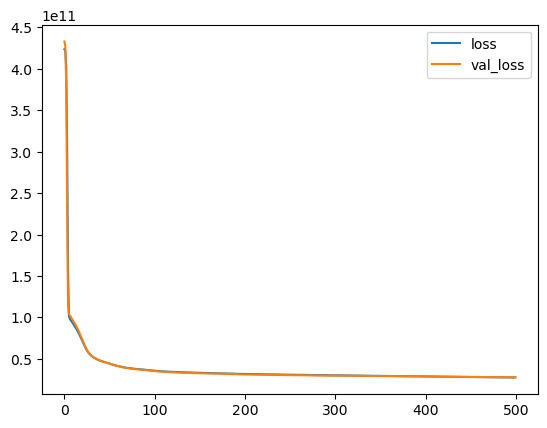

In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

This is what we want where there is decrease in both the train loss and the validation loss and then there is no increase so far in the validation set -> means technically we can continue training(after 400 epochs there is not much improving that much - decreasing of loss value is happening much slower) but since because validation loss is also going down, that indicates we could continue training without overfitting to our training data

is val_data(orange line) begins to spike and goes up and up and up , then we are overfitting to the training data because i have a much larger loss to the validation data.

we will discuss a way to stop training on its own to avoid overfitting

# Evaluation

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [59]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [60]:
mean_squared_error(y_test,predictions)

27814919347.970737

In [61]:
np.sqrt(mean_squared_error(y_test,predictions))

166778.05415572738

In [62]:
mean_absolute_error(y_test,predictions)

104582.13385472895

In [63]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [64]:
5.400881e+05

540088.1

In [65]:
# we are off by arounf 20% not that great.

In [66]:
explained_variance_score(y_test,predictions)

0.8023747215946725

In [67]:
# Its okay, neither great nor horrible

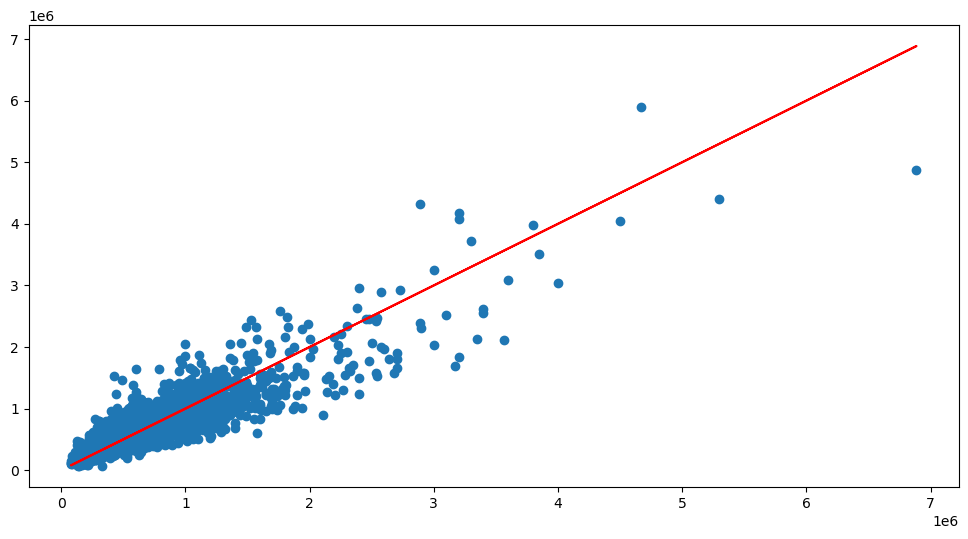

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

We are doing good till 2 million doller price but
We are punished by the extremely expensive houses, we can train our model on df_non_1_percent data(99% data)

# Predict brand new house

In [69]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [70]:
single_house = df.drop('price',axis=1).iloc[0]

In [71]:
# now scale it
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [72]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [73]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [74]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182]])

In [75]:
model.predict(single_house)

1/1 [==============================] - 0s 22ms/step


array([[294171.84]], dtype=float32)

In [76]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


y = 221900.0

y^ = 281539.4

# Saving the model

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save('House_Price_Prediction.h5')  # creates a HDF5 file 'my_model.h5'

In [79]:
New_model = load_model('House_Price_Prediction.h5')

In [80]:
New_model.predict(X_test)

203/203 [==============================] - 0s 839us/step


array([[533208.2 ],
       [640187.06],
       [515098.38],
       ...,
       [405916.34],
       [218088.9 ],
       [976596.2 ]], dtype=float32)